<a href="https://colab.research.google.com/github/NguyenVanLuu821/AI_Excerise_week12/blob/main/ROBOT_2_DOF_WEEK12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.IMPORT LIBRARY

In [ ]:
import numpy as np
import math as m
import csv
import pandas as pd
import matplotlib.pyplot as plt
from numpy.lib.function_base import append
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam


#2.CREATE DATA

In [ ]:
#create data
l1 = 50 #length for link 1
l2 = 40 #length for link 2
#create array for data
x_train = [] 
y_train = []
data=[]
a = [] 
for t1 in range(0, 180, 1):
  for t2 in range(0, 180, 1):
    #forward kinematics
    px = l1*m.cos(m.radians(t1)) + l2*m.cos(m.radians(t1+t2))
    py = l1*m.sin(m.radians(t1)) + l2*m.sin(m.radians(t1+t2))
    a.append(np.array((t1,t2,px,py))) #colletion of variables into an array
  data.extend(a)

In [ ]:
#save data into file robot_2_dof.csv
header = ['t1', 't2', 'Px', 'Py'] 
with open('robot_2_dof.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)
    # write the multiple rows
    writer.writerows(data)

In [ ]:
#processing data
data=pd.read_csv('robot_2_dof.csv')
x=(np.array(data.drop(['t1','t2'],axis=1))+90)/180   #create variable y containing input data is px, py 
y=np.array(data[['t1','t2']])/180  #create variable y containing output data is angle t1, t2
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
x_train.shape

(2345760, 2)

#3.CREATE MODEL

In [ ]:
#create model
model = Sequential() 
model.add(Dense(64, activation='relu', input_shape = (2,))) #2 input and 64 noron for layer 1
model.add(Dense(64, activation='relu')) #64 noron for layer 2
model.add(Dense(32, activation='relu')) #32 noron for layer 3
model.add(Dense(2)) #2 output
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 6,498
Trainable params: 6,498
Non-trainable params: 0
_________________________________________________________________


#4.TRAINING

In [ ]:
model.compile(loss='mae', optimizer =Adam(), metrics=['acc']) #using mae
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)  #80% data for train, 20% data for test

Epoch 1/10
58644/58644 [==============================] - 111s 2ms/step - loss: 0.0089 - acc: 0.9816 - val_loss: 0.0069 - val_acc: 0.9769
Epoch 2/10
58644/58644 [==============================] - 110s 2ms/step - loss: 0.0055 - acc: 0.9879 - val_loss: 0.0058 - val_acc: 0.9878
Epoch 3/10
58644/58644 [==============================] - 115s 2ms/step - loss: 0.0048 - acc: 0.9890 - val_loss: 0.0038 - val_acc: 0.9907
Epoch 4/10
58644/58644 [==============================] - 109s 2ms/step - loss: 0.0043 - acc: 0.9898 - val_loss: 0.0046 - val_acc: 0.9901
Epoch 5/10
58644/58644 [==============================] - 115s 2ms/step - loss: 0.0040 - acc: 0.9904 - val_loss: 0.0031 - val_acc: 0.9904
Epoch 6/10
58644/58644 [==============================] - 115s 2ms/step - loss: 0.0038 - acc: 0.9908 - val_loss: 0.0040 - val_acc: 0.9890
Epoch 7/10
58644/58644 [==============================] - 107s 2ms/step - loss: 0.0037 - acc: 0.9911 - val_loss: 0.0035 - val_acc: 0.9936
Epoch 8/10
58644/58644 [==========

In [ ]:
#save model
model.save_weights('robot_2_dof_v2.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


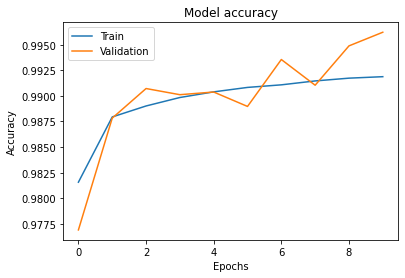

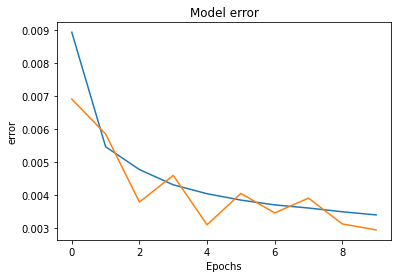

In [ ]:
#plot accurracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

#plot error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('Epochs')
plt.show()

#5.PREDICT

In [ ]:
px = (int(input("Px_desires: "))+90)/180 #enter the Px desired value
py = (int(input("Py_desires: "))+90)/180 #enter the Py desired value
test = model.predict([[px,py]])
t1 = test[0][0]*180
t2 = test[0][1]*180
px_predict = l1*m.cos(m.radians(t1)) + l2*m.cos(m.radians(t1+t2))
py_predict = l1*m.sin(m.radians(t1)) + l2*m.sin(m.radians(t1+t2))
print('Px_pre = ',px_predict,'Py_pre = ',py_predict)
print('t1_pre = ',t1,'t2_pre = ',t2)

Px_desires: 50
Py_desires: 50
Px_pre =  50.1440143514426 Py_pre =  50.16722849945843
t1_pre =  11.753413081169128 t2_pre =  76.53842210769653
